In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
matplotlib.use('agg')

In [6]:
import pandas as pd
#path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230929_RULE_BASE_stroke.pkl"
animal = "Diego"
date = "230630"
path= f"/home/kgg/Desktop/eyetracking_analyses/{animal}-{date}/dfallpa.pkl"
DFallpa = pd.read_pickle(path)

In [7]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,flex,fixon_preparation,M1_m,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(23, 1893, 80)"
1,flex,fixon_preparation,M1_l,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(18, 1893, 80)"
2,flex,fixon_preparation,PMv_l,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 1893, 80)"
3,flex,fixon_preparation,PMv_m,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(36, 1893, 80)"
4,flex,fixon_preparation,PMd_p,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(24, 1893, 80)"
5,flex,fixon_preparation,PMd_a,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(19, 1893, 80)"
6,flex,fixon_preparation,dlPFC_a,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(27, 1893, 80)"
7,flex,fixon_preparation,vlPFC_p,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 1893, 80)"
8,flex,fixon_preparation,vlPFC_a,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(18, 1893, 80)"
9,flex,fixon_preparation,FP_p,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(17, 1893, 80)"


# first, extract templates from single-prim trials

In [ ]:
# variables to change

twindb = 40
twinda = 80

In [ ]:
templates = {}
for i, row in DFallpa.iterrows():
    bregion = row['bregion']
    pa = row['pa']
    data = pa.Xlabels['trials']
    single_arc_inds = np.sort(list(data[(data['task_kind']=='prims_single') & (data['seqc_0_shape']=='arcdeep-4-3-0')].index))
    single_line_inds = np.sort(list(data[(data['task_kind']=='prims_single') & (data['seqc_0_shape']=='line-8-1-0')].index))
    single_z_inds = np.sort(list(data[(data['task_kind']=='prims_single') & (data['seqc_0_shape']=='zigzagSq-1-1-1')].index))
    single_v_inds = np.sort(list(data[(data['task_kind']=='prims_single') & (data['seqc_0_shape']=='V-2-2-0')].index))
    postfix_arc_fr = pa.X[:, single_arc_inds, twindb:twinda]
    postfix_line_fr = pa.X[:, single_line_inds, twindb:twinda]
    postfix_z_fr = pa.X[:, single_z_inds, twindb:twinda]
    postfix_v_fr = pa.X[:, single_v_inds, twindb:twinda]
    arc_template = np.mean(np.mean(postfix_arc_fr, axis=1), axis=1)
    line_template = np.mean(np.mean(postfix_line_fr, axis=1), axis=1)
    z_template = np.mean(np.mean(postfix_z_fr, axis=1), axis=1)
    v_template = np.mean(np.mean(postfix_v_fr, axis=1), axis=1)
    templates[bregion] = {'arcdeep-4-3-0': arc_template, 'line-8-1-0': line_template,
                         'zigzagSq-1-1-1': z_template, 'V-2-2-0': v_template}

In [ ]:
templates

# next, extract representations from actual trials (preparation period)

In [ ]:
def cos_similarity(a, b):
    from numpy import dot
    from numpy.linalg import norm
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {'230630': [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
Searching using this string:
/home/kgg/mnt/Freiwald/kgupta/neural_data/*Diego*/*230630*/*Diego*230630**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/kgupta/neural_data/Diego/230630/Diego-230630-124955
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [14115.359024]
...  onsets_using_rs4_each_rs : {2

added new column self.Dat[Task]
=== CLEANING UP self.Dat (_cleanup_reloading_saved_state) ===== 
0 _behclass_alignsim_compute
200 _behclass_alignsim_compute
400 _behclass_alignsim_compute
600 _behclass_alignsim_compute
Running D._behclass_tokens_extract_datsegs
0 _behclass_tokens_extract_datsegs
200 _behclass_tokens_extract_datsegs
400 _behclass_tokens_extract_datsegs
600 _behclass_tokens_extract_datsegs
stored in self.Dat[BehClass]
Removing these trials: 
[]
self.Dat starting legnth:  648
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  648
- starting/ending len (grouping params):
648
ADded new column: supervision_online
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_SEQUENCE_ALPHA]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_ITEMS_FADE_TO_DEFAULT_BINSTR]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
Appended self.Dat[superv_VISUALFB_METH]
appended col to self.Dat:
supervision_stage_new
Appe

1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307


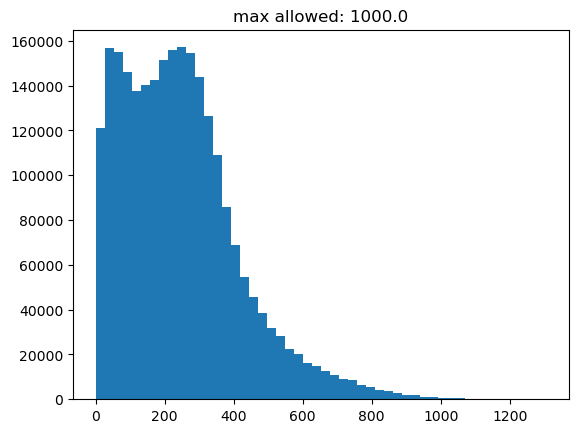

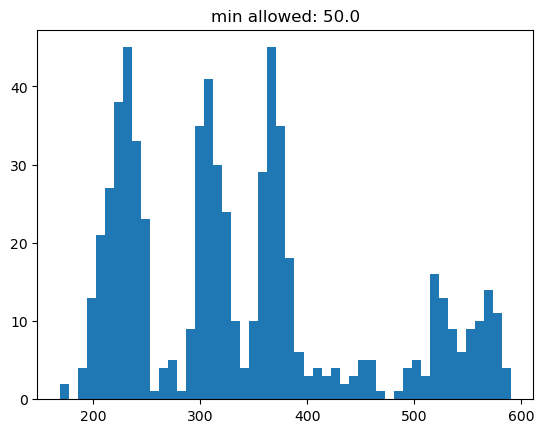

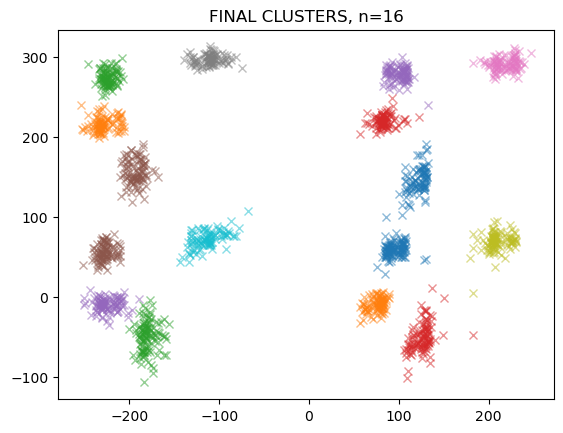

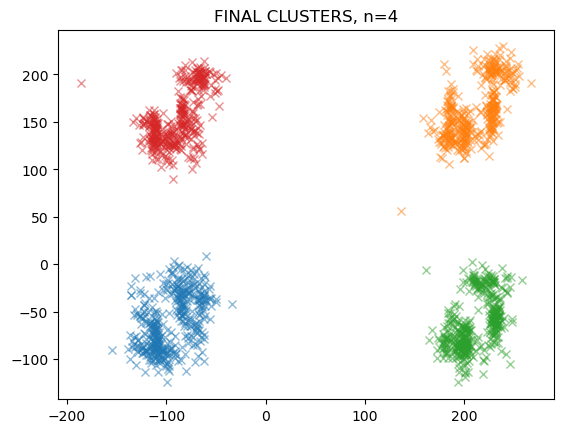

In [8]:
MS = load_mult_session_helper(date, animal)

In [ ]:
bregions = DFallpa['bregion'].unique()
twind = 20

savedir = f"/home/kgg/Desktop/eyetracking_analyses/GEOMETRY/{animal}-{date}"
os.makedirs(savedir, exist_ok=True)

all_data = DFallpa.iloc[0]['pa'].Xlabels['trials']
pig_tc = all_data[all_data['task_kind']=='prims_on_grid']['trialcode'].unique()

for tc in pig_tc:
    session = int(tc[7])-1 # e.g. trialcode 230623-1-1001 is in session 1 or index 0
    sn = MS.SessionsList[session]
    nt = sn.datasetbeh_trialcode_to_trial(tc)
    stim_onset = sn.get_time_window_of_events(nt, 'stim_onset', 'go')[0]
    for b in bregions:
        savefile = f"{savedir}/{tc}-{b}.png"
        # pull out trial and fixation information
        dfrow = DFallpa[DFallpa['bregion']==b].iloc[0]
        pa = dfrow['pa']
        data = pa.Xlabels['trials']
        tc_inds = data[data['trialcode']==tc].index
        tc_data = data[data['trialcode']==tc].reset_index(drop=True)

        # plots
        fig, axes = plt.subplots(len(tc_inds), 2, squeeze=False, figsize=(20, 20))

        # plot task image + each fixation
        shapefixes = [] # collect
        seqc0shapes = [] # collect
        for i, row in tc_data.iterrows():
            shapefixes.append(row['shape-fixation'])
            seqc0shapes.append(row['seqc_0_shape'])
            # get fixation time, centroid
            time = row['event_time'] - stim_onset
            fixc = row['fixation-centroid']
            # plot raw task image, plus fixation as red dot
            ax = axes[i, 0]
            sn.plot_taskimage(ax, nt)
            ax.plot(fixc[0], fixc[1], 'ro')
            ax.set_title(time)
            fig.suptitle("drawing:" + row['seqc_0_shape'])# + ", pre:" + str(twind*10) + "ms, post:"
            #            + str(twind*10) + "ms")

        # for each fixation, plot cosine similarities for pre, post neural representations
        for i, j in enumerate(tc_inds):
            # get shapefix,seqc0shape
            shapefix = shapefixes[i]
            seqc0shape = seqc0shapes[i]

            # get pre, post representations
            prefix_fr = pa.X[:, j, 40-twind:40]
            prefix_nrep = np.mean(prefix_fr, axis=1)
            postfix_fr = pa.X[:, j, 40:40+twind]
            postfix_nrep = np.mean(postfix_fr, axis=1)
            # calculate cos distances to templates
            prefix_cos_sim = [cos_similarity(prefix_nrep, template) for template in templates[b].values()]
            postfix_cos_sim = [cos_similarity(postfix_nrep, template) for template in templates[b].values()]

            # plotting
            ax = axes[i, 1]
            ax.set_title("Cosine Similarity (" + str(twind*10) + "ms pre | " + str(twind*10) + "ms post)")
            ax.axhline(0)
            ax.set_ylim([-1, 1])
            ax.set_box_aspect(1)

            # get list of colors for cosine similarity, to indicate looking/drawing
            shape_labels = [key for key in templates[b].keys()]
            colors = ['k']*len(shape_labels)
            sfi = shape_labels.index(shapefix)
            sq0i = shape_labels.index(seqc0shape)
            if sfi==sq0i: #looking at what will draw
                colors[sfi] = 'm'
            else: #looking at other item
                colors[sfi] = 'r'
                colors[sq0i] = 'b'

            # plot pre
            x1 = np.ones(len(prefix_cos_sim))
            ax.scatter(x1, prefix_cos_sim,c=colors)
            for k, txt in enumerate(shape_labels):
                ax.annotate(txt, (x1[k], prefix_cos_sim[k]))

            # plot post
            x2 = 2*x1
            ax.scatter(x2, postfix_cos_sim, c=colors)
            for k, txt in enumerate(shape_labels):
                ax.annotate(txt, (x2[k], postfix_cos_sim[k]))
            
        plt.savefig(savefile)
        plt.close()

In [ ]:
# todo after skeleton code:
# - re-make dfallpa, but aligned to "trial" events; then, re-make templates using average fr between stim_onset, go
# - in future, make sure to normalize both dfallpa's the same (?)

# examining fixations

In [9]:
sn = MS.SessionsList[0]

In [10]:
trialcode = '230630-1-376'
trial = sn.datasetbeh_trialcode_to_trial(trialcode)
onsets_f = f"/home/kgg/Desktop/eyetracking_analyses/Diego-230630-0/clusterfix_result_csvs/{trialcode}-fixation-onsets.csv"
centroids_f = f"/home/kgg/Desktop/eyetracking_analyses/Diego-230630-0/clusterfix_result_csvs/{trialcode}-fixation-centroids.csv"
onsets_df = pd.read_csv(onsets_f, header=None)
onsets_df.columns = ['onsets']
centroids_df = pd.read_csv(centroids_f, header=None)
centroids_df.columns = ['x', 'y']

In [ ]:
stim_onset = sn.get_time_window_of_events(trial, 'stim_onset', 'go')[0]
go = sn.get_time_window_of_events(trial, 'stim_onset', 'go')[1]

In [ ]:
prep_inds = onsets_df.index[(onsets_df['onsets']>stim_onset) & (onsets_df['onsets']<go)].tolist()

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sn.plot_taskimage(ax, trial)
x = list(centroids_df['x'][prep_inds])
y = list(centroids_df['y'][prep_inds])
times = onsets_df['onsets'][prep_inds]-stim_onset
#ax.scatter(x, y, c=t, cmap='viridis', s=10)
ax.plot(x,y)
for i,t in enumerate(times):
    ax.annotate(t, (x[i], y[i]))

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sn.plot_taskimage(ax, trial)
x = centroids_df['x']
y = centroids_df['y']
times = onsets_df['onsets']-stim_onset
#ax.scatter(x, y, c=t, cmap='viridis', s=10)
ax.plot(x,y)
for i,t in enumerate(times):
    ax.annotate(t, (x[i], y[i]))

In [11]:
sn.beh_eye_fixation_extract_and_assign_task_shape(PLOT=True)

AttributeError: 'Session' object has no attribute 'beh_eye_fixation_extract_and_assign_task_shape'